In [1]:
import time

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options as FirefoxOptions

from os import path

In [112]:
url = "https://www.jumbocolombia.com/"

In [113]:
web_driver = webdriver.Firefox()
web_driver.get(url)

In [95]:
products_path = []
for i in range(len(menu_items_text)):
    web_driver.get(url)
    time.sleep(2)  # Wait for the page to load

    menu_bar = web_driver.find_element(By.CLASS_NAME, "vtex-flex-layout-0-x-flexRow vtex-flex-layout-0-x-flexRow--menu-categories".replace(" ", "."))
    menu_button = menu_bar.find_element(By.CLASS_NAME, "tiendasjumboqaio-jumbo-general-apps-2-x-containerTriggerButton--tigger-dropdown-mega-menu".replace(" ", "."))
    menu_button.click()

    menu_block = web_driver.find_element(By.CLASS_NAME, "tiendasjumboqaio-jumbo-main-menu-2-x-nav_menu".replace(" ", "."))
    # print("Menu block found", menu_block.text)
    menu_items = menu_block.find_elements(By.TAG_NAME, "li")
    menu_items_text = [item.text for item in menu_items]

    menu_item = menu_items[i]
    category_name = menu_item.text.replace(" ", "_").replace("/", "_")
    ActionChains(web_driver).click_and_hold(menu_item).perform()

    category_products = []
    submenu_block = web_driver.find_element(By.CLASS_NAME, "tiendasjumboqaio-jumbo-main-menu-2-x-nav_menu tiendasjumboqaio-jumbo-main-menu-2-x-nav_menu--header-submenu-item tiendasjumboqaio-jumbo-main-menu-2-x-second_level tiendasjumboqaio-jumbo-main-menu-2-x-second_level--header-submenu-item".replace(" ", "."))
    submenu_items = submenu_block.find_elements(By.CLASS_NAME, "tiendasjumboqaio-jumbo-main-menu-2-x-menu_item_inner tiendasjumboqaio-jumbo-main-menu-2-x-menu_item_inner--header-submenu-item".replace(" ", "."))
    submenu_items_text = [item.text for item in submenu_items]
    products_path.append({
        "category": category_name,
        "submenu_items": submenu_items_text
    })


MoveTargetOutOfBoundsException: Message: Move target (234, 844) is out of bounds of viewport dimensions (1470, 835)
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:199:5
MoveTargetOutOfBoundsError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:518:5
assertTargetInViewPort@chrome://remote/content/shared/webdriver/Actions.sys.mjs:3103:11
#assertInViewPort@chrome://remote/content/marionette/actors/MarionetteCommandsChild.sys.mjs:115:17
receiveMessage@chrome://remote/content/marionette/actors/MarionetteCommandsChild.sys.mjs:210:42


In [96]:
products_path

[{'category': 'Supermercado',
  'submenu_items': ['Despensa\nArroz y granos\nAceite\nCafé\nBebida achocolatada en polvo\nCereales\nHarinas y mezclas para preparar\nPastas\nEnlatados y conservas\nAzucar, endulzantes y panelas\nChocolate de mesa\nAvenas y salvado\nCondimentos, caldos y sal\nBases, cremas y sopas\nSalsas y vinagres\nTé, infusiones e instantáneos\nVer todo despensa',
   'Arroz y granos',
   'Aceite',
   'Café',
   'Bebida achocolatada en polvo',
   'Cereales',
   'Harinas y mezclas para preparar',
   'Pastas',
   'Enlatados y conservas',
   'Azucar, endulzantes y panelas',
   'Chocolate de mesa',
   'Avenas y salvado',
   'Condimentos, caldos y sal',
   'Bases, cremas y sopas',
   'Salsas y vinagres',
   'Té, infusiones e instantáneos',
   'Lácteos, huevos y refrigerados\nLeche\nHuevos\nQueso\nArepas\nMantequilla\nMargarina\nYogurt\nKumis\nAvena\nWaffles y Crepes\nTamales\nLeches vegetales\nPostres refrigerados\nCarnes frías y embutidos\nVer todo lácteos, huevos y refriger

In [115]:
def clean_word(word):
    word = word.replace(" ", "-")
    word = word.replace("/", "_")
    word = word.replace(",", "")
    word = word.replace("á", "a")
    word = word.replace("é", "e")
    word = word.replace("í", "i")
    word = word.replace("ó", "o")
    word = word.replace("ú", "u")
    word = word.lower()
    return word

In [117]:
paths = []

for item in products_path:
    category = clean_word(item["category"])
    submenu_items = item["submenu_items"]
    subcategory = ""
    for submenu_item in submenu_items:
        if "\n" in submenu_item:
            subcategory = clean_word(submenu_item.split("\n")[0])
        else:
            path_for_subcategory = path.join(category, subcategory, clean_word(submenu_item))
            paths.append(path_for_subcategory)

In [118]:
paths

['supermercado/despensa/arroz-y-granos',
 'supermercado/despensa/aceite',
 'supermercado/despensa/cafe',
 'supermercado/despensa/bebida-achocolatada-en-polvo',
 'supermercado/despensa/cereales',
 'supermercado/despensa/harinas-y-mezclas-para-preparar',
 'supermercado/despensa/pastas',
 'supermercado/despensa/enlatados-y-conservas',
 'supermercado/despensa/azucar-endulzantes-y-panelas',
 'supermercado/despensa/chocolate-de-mesa',
 'supermercado/despensa/avenas-y-salvado',
 'supermercado/despensa/condimentos-caldos-y-sal',
 'supermercado/despensa/bases-cremas-y-sopas',
 'supermercado/despensa/salsas-y-vinagres',
 'supermercado/despensa/te-infusiones-e-instantaneos',
 'supermercado/lacteos-huevos-y-refrigerados/leche',
 'supermercado/lacteos-huevos-y-refrigerados/huevos',
 'supermercado/lacteos-huevos-y-refrigerados/queso',
 'supermercado/lacteos-huevos-y-refrigerados/arepas',
 'supermercado/lacteos-huevos-y-refrigerados/mantequilla',
 'supermercado/lacteos-huevos-y-refrigerados/margarina

In [175]:
def close_popup():
    popup = web_driver_path.find_element(By.CLASS_NAME, "tiendasjumboqaio-delivery-modal-3-x-locationVerificationAd")
    if popup.is_displayed():
        print("Popup is displayed, closing it.")
        close_button = popup.find_element(By.CLASS_NAME, "tiendasjumboqaio-delivery-modal-3-x-locationVerificationAd__close")
        close_button.click()

In [186]:
products = []

for product_category_path in paths:
    products_path = path.join(url, product_category_path)
    web_driver_path = webdriver.Firefox()
    # Headless mode can be enabled by uncommenting the next line
    web_driver_path.get(products_path)

    time.sleep(2)  # Wait for the page to load

    # Scroll to the bottom of the page to load all products
    web_driver_path.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(0.5) 
    # web_driver_path.execute_script("window.scrollTo(0, document.body.scrollHeight);") # Wait for the page to load
    # time.sleep(0.5)  # Wait for the page to load
    pages = web_driver_path.find_elements(By.CLASS_NAME, "tiendasjumboqaio-jumbo-fetch-more-paginator-0-x-buttonPerPage".replace(" ", "."))


    for page_i in range(len(pages)):
        product_items = web_driver_path.find_elements(By.CLASS_NAME, "tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem--gallery-css tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem--normal tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem--gallery-css--normal tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem--grid tiendasjumboqaio-cmedia-integration-cencosud-1-x-galleryItem--gallery-css--grid pa4".replace(" ", "."))
        for product in product_items:
            product_name = product.find_element(By.CLASS_NAME, "vtex-product-summary-2-x-productBrand vtex-product-summary-2-x-brandName t-body".replace(" ", ".")).text
            product_image = product.find_element(By.TAG_NAME, "img").get_attribute("src")
            products.append({"name": product_name, "image": product_image, "category": product_category_path})

        paginator = web_driver_path.find_element(By.CLASS_NAME, "tiendasjumboqaio-jumbo-fetch-more-paginator-0-x-buttonShowMore--layout".replace(" ", "."))
        pages = web_driver_path.find_elements(By.CLASS_NAME, "tiendasjumboqaio-jumbo-fetch-more-paginator-0-x-buttonPerPage")
        print(f"Clicking on page {page_i + 1} of {len(pages)}")
        close_popup()

        pages[page_i].click() 
        web_driver_path.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2) 
    
        print(f"Products in {product_category_path}: {len(products)}")
    web_driver_path.quit()

Clicking on page 1 of 7
Popup is displayed, closing it.
Products in supermercado/despensa/arroz-y-granos: 24
Clicking on page 2 of 7
Products in supermercado/despensa/arroz-y-granos: 48
Clicking on page 3 of 7
Products in supermercado/despensa/arroz-y-granos: 72
Clicking on page 4 of 7
Products in supermercado/despensa/arroz-y-granos: 96
Clicking on page 5 of 7
Products in supermercado/despensa/arroz-y-granos: 120
Clicking on page 6 of 7
Products in supermercado/despensa/arroz-y-granos: 144
Clicking on page 7 of 7
Products in supermercado/despensa/arroz-y-granos: 168
Clicking on page 1 of 5
Popup is displayed, closing it.
Products in supermercado/despensa/aceite: 188
Clicking on page 2 of 5
Products in supermercado/despensa/aceite: 208
Clicking on page 3 of 5
Products in supermercado/despensa/aceite: 228
Clicking on page 4 of 5
Products in supermercado/despensa/aceite: 252
Clicking on page 5 of 5
Products in supermercado/despensa/aceite: 276
Clicking on page 1 of 10
Popup is displayed,

StaleElementReferenceException: Message: The element with the reference aec74901-21dd-4bd1-8cc9-602cfb7c6dee is stale; either its node document is not the active document, or it is no longer connected to the DOM; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:199:5
StaleElementReferenceError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:796:5
getKnownElement@chrome://remote/content/marionette/json.sys.mjs:405:11
deserializeJSON@chrome://remote/content/marionette/json.sys.mjs:263:20
cloneObject@chrome://remote/content/marionette/json.sys.mjs:59:24
deserializeJSON@chrome://remote/content/marionette/json.sys.mjs:293:16
cloneObject@chrome://remote/content/marionette/json.sys.mjs:59:24
deserializeJSON@chrome://remote/content/marionette/json.sys.mjs:293:16
json.deserialize@chrome://remote/content/marionette/json.sys.mjs:297:10
receiveMessage@chrome://remote/content/marionette/actors/MarionetteCommandsChild.sys.mjs:202:30


In [187]:
products

[{'name': 'Arroz Diana blanco x10kg ',
  'image': 'https://jumbocolombiaio.vtexassets.com/arquivos/ids/659910-300-300?v=638599488512130000&width=300&height=300&aspect=true',
  'category': 'supermercado/despensa/arroz-y-granos'},
 {'name': 'Arroz Diana blanco x5kg ',
  'image': 'https://jumbocolombiaio.vtexassets.com/arquivos/ids/186323-300-300?v=637813981860700000&width=300&height=300&aspect=true',
  'category': 'supermercado/despensa/arroz-y-granos'},
 {'name': 'Arroz Sonora x10kg ',
  'image': 'https://jumbocolombiaio.vtexassets.com/arquivos/ids/660331-300-300?v=638604589891570000&width=300&height=300&aspect=true',
  'category': 'supermercado/despensa/arroz-y-granos'},
 {'name': 'Arroz Diana blanco x3kg ',
  'image': 'https://jumbocolombiaio.vtexassets.com/arquivos/ids/186321-300-300?v=637813981854430000&width=300&height=300&aspect=true',
  'category': 'supermercado/despensa/arroz-y-granos'},
 {'name': 'Arroz Diana Premium blanco x4000g ',
  'image': 'https://jumbocolombiaio.vtexasse

In [9]:
import pandas as pd

# df = pd.DataFrame(products)
df = pd.read_csv("jumbo_products.csv")

In [ ]:
# download images
import requests
import os

for index, row in df.iterrows():
    product_id = index
    image_url = row["image"]
    image_name = str(product_id) + ".webp"
    image_path = path.join("images", image_name)

    if not path.exists("images"):
        os.makedirs("images")

    if not path.exists(image_path):
        print(f"Downloading {image_name}...")
        response = requests.get(image_url)
        with open(image_path, "wb") as file:
            file.write(response.content)
    else:
        print(f"{image_name} already exists, skipping download.")


In [200]:
df

,name,image,category
0,Arroz Diana blanco x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos
1,Arroz Diana blanco x5kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos
2,Arroz Sonora x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos
3,Arroz Diana blanco x3kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos
4,Arroz Diana Premium blanco x4000g,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos
...,...,...,...
7446,Desodorante Antitranspirante Rexona Men Motion...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes
7447,Desodorante Aclarante Nivea Tono Natural Class...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes
7448,Desodorante Balance Mini Crema Clinical Protec...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes
7449,Desodorante Hombre Speed Stick Xtreme Night Ge...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes


In [53]:
from datasets import Dataset, DatasetDict, Features, Value, ClassLabel, Image
import pandas as pd

# Suponiendo que ya tienes el DataFrame df
df['image_path'] = df.index.astype(str) + '.webp'
df['image_path'] = df['image_path'].apply(lambda x: f'./images/{x}')  # Ruta local

# Puedes verificar si todas las imágenes existen (opcional)
import os
df = df[df['image_path'].apply(os.path.exists)]

# Crear Dataset de Hugging Face
hf_dataset = Dataset.from_pandas(
    df[['name', 'category', 'image_path']],
    features=Features({
        'name': Value('string'),
        'category': Value('string'),
        'image_path': Value('string'),
        'image': Image()
    }),
    preserve_index=False
)


/Users/valentinaferuere/Projects/supermarket-scrapping/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
df

,Unnamed: 0,name,image,category,image_path
0,0,Arroz Diana blanco x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/0.webp
1,1,Arroz Diana blanco x5kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/1.webp
2,2,Arroz Sonora x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/2.webp
3,3,Arroz Diana blanco x3kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/3.webp
4,4,Arroz Diana Premium blanco x4000g,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/4.webp
...,...,...,...,...,...
7445,7446,Desodorante Antitranspirante Rexona Men Motion...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7445.webp
7446,7447,Desodorante Aclarante Nivea Tono Natural Class...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7446.webp
7447,7448,Desodorante Balance Mini Crema Clinical Protec...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7447.webp
7448,7449,Desodorante Hombre Speed Stick Xtreme Night Ge...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7448.webp


In [55]:
hf_dataset["image_path"]

['./images/0.webp',
 './images/1.webp',
 './images/2.webp',
 './images/3.webp',
 './images/4.webp',
 './images/5.webp',
 './images/6.webp',
 './images/7.webp',
 './images/8.webp',
 './images/9.webp',
 './images/10.webp',
 './images/11.webp',
 './images/12.webp',
 './images/13.webp',
 './images/14.webp',
 './images/15.webp',
 './images/16.webp',
 './images/17.webp',
 './images/18.webp',
 './images/19.webp',
 './images/20.webp',
 './images/21.webp',
 './images/22.webp',
 './images/23.webp',
 './images/24.webp',
 './images/25.webp',
 './images/26.webp',
 './images/27.webp',
 './images/28.webp',
 './images/29.webp',
 './images/30.webp',
 './images/31.webp',
 './images/32.webp',
 './images/33.webp',
 './images/34.webp',
 './images/35.webp',
 './images/36.webp',
 './images/37.webp',
 './images/38.webp',
 './images/39.webp',
 './images/40.webp',
 './images/41.webp',
 './images/42.webp',
 './images/43.webp',
 './images/44.webp',
 './images/45.webp',
 './images/46.webp',
 './images/47.webp',
 '

In [224]:
df.to_csv("jumbo_products.csv", index=True)

In [225]:
df

,name,image,category,image_path
0,Arroz Diana blanco x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/0.webp
1,Arroz Diana blanco x5kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/1.webp
2,Arroz Sonora x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/2.webp
3,Arroz Diana blanco x3kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/3.webp
4,Arroz Diana Premium blanco x4000g,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/4.webp
...,...,...,...,...
7446,Desodorante Antitranspirante Rexona Men Motion...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7446.webp
7447,Desodorante Aclarante Nivea Tono Natural Class...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7447.webp
7448,Desodorante Balance Mini Crema Clinical Protec...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7448.webp
7449,Desodorante Hombre Speed Stick Xtreme Night Ge...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7449.webp


In [4]:
import oci
print(oci.__version__)

2.154.3


In [11]:
def convert_image_to_base64(image: Image):

    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    # pil_image = Image.open(BytesIO(image))
    #base 64 encode
    try:
        base64_image = base64.b64encode(buffered.getvalue()).decode("utf-8")
        base64_image_url = f"data:image/jpeg;base64,{base64_image}"
        return base64_image_url
    except Exception as e:
        raise ValueError(f"Erro ao acessar a imagem")
   
   
def create_image_content_message(image):
    base64_image_url = convert_image_to_base64(image)
    # Configuração do conteúdo da imagem
    imagem = oci.generative_ai_inference.models.ImageContent()
    image_url_content = oci.generative_ai_inference.models.ImageUrl()
    image_url_content.url = base64_image_url
    imagem.image_url = image_url_content

    return imagem

def create_text_content_message(text):

    # Configuração do conteúdo de texto
    texto = oci.generative_ai_inference.models.TextContent()
    texto.text = text

    return texto

def create_list_of_messages(messages):
    messages_content_for_chat = []
    for message in messages:
        message_for_chat = oci.generative_ai_inference.models.UserMessage()
        message_for_chat.role = message["role"]

        for messages_content in message["messages"]:
            message_content = []
            if "text" in messages_content:
                texto = create_text_content_message(messages_content["text"])
                message_content.append(texto)
            if "image" in messages_content:
                imagem = create_image_content_message(messages_content["image"])
                message_content.append(imagem)
        message_for_chat.content = message_content
        messages_content_for_chat.append(message_for_chat)
    
    return messages_content_for_chat

In [6]:
from PIL import Image
import base64
from io import BytesIO

[{
   "content": [
     {
       "image_url": {
         "detail": null,
         "url": ""
       },
       "type": "IMAGE"
     }
   ],
   "name": null,
   "role": "USER"
 },
 {
   "content": [
     {
       "text": "\"\nEres un experto en productos de supermercado. A partir de la descripción de los productos que haces, los usuarios pueden navegar e identificar productos similares, por lo que es importante que describas el contenido del paquete y no te enfoques en el paquete.\nLa presentación del producto es importante, no te enfoques en los colores y la marca, sino en la forma, el tamaño y la cantidad de productos que hay en el paquete.\nDescribe el producto de la imagen que te enviaré a continuación. \nNo incluyas información sobre la marca, el precio o el lugar donde se vende.\nSolo describe el producto en sí, su forma, tamaño y cantidad.\n",
       "type": "TEXT"
     }
   ],
   "name": null,
   "role": "USER"
 }]
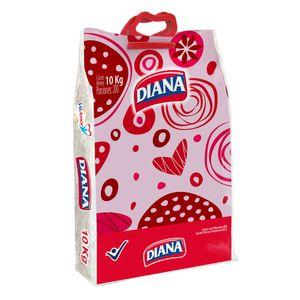

In [43]:
PROMPT = """"
Eres un experto en productos de supermercado. A partir de la descripción de los productos que haces, los usuarios pueden navegar e identificar productos similares, por lo que es importante que describas el contenido del paquete y no te enfoques en el paquete.
La presentación del producto es importante, no te enfoques en los colores y la marca, sino en la forma, el tamaño y la cantidad de productos que hay en el paquete.
Describe el producto de la imagen que te enviaré a continuación. 
No incluyas información sobre la marca, el precio o el lugar donde se vende.
Solo describe el producto en sí, su forma, tamaño y cantidad.
"""

image = Image.open(df["image_path"].iloc[0])
messages = create_list_of_messages([
    {
        "role": "USER",
        "messages": [
            {"image": image}
        ]
    },
    {
        "role": "USER",
        "messages": [
            {"text": PROMPT},
        ]
    }
])
messages

[{
   "content": [
     {
       "image_url": {
         "detail": null,
         "url": ""
       },
       "type": "IMAGE"
     }
   ],
   "name": null,
   "role": "USER"
 },
 {
   "content": [
     {
       "text": "\"\nEres un experto en productos de supermercado. A partir de la descripción de los productos que haces, los usuarios pueden navegar e identificar productos similares, por lo que es importante que describas el contenido del paquete y no te enfoques en el paquete.\nLa presentación del producto es importante, no te enfoques en los colores y la marca, sino en la forma, el tamaño y la cantidad de productos que hay en el paquete.\nDescribe el producto de la imagen que te enviaré a continuación. \nNo incluyas información sobre la marca, el precio o el lugar donde se vende.\nSolo describe el producto en sí, su forma, tamaño y cantidad.\n",
       "type": "TEXT"
     }
   ],
   "name": null,
   "role": "USER"
 }]
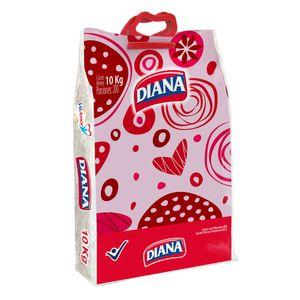

In [44]:
messages

In [45]:
# Configuração do cliente usando arquivo config
config = oci.config.from_file("~/.oci/config", "DEFAULT")
signer = oci.signer.Signer(
    tenancy=config["tenancy"],
    user=config["user"],
    fingerprint=config["fingerprint"],
    private_key_file_location=config["key_file"],
    pass_phrase=config.get("pass_phrase")
)

endpoint = "https://inference.generativeai.us-chicago-1.oci.oraclecloud.com"
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(
    config=config,
    signer=signer,
    service_endpoint=endpoint,
    retry_strategy=oci.retry.NoneRetryStrategy(),
    timeout=(100, 240)
)

In [ ]:
def inference(messages):

    # Configuração da solicitação de chat
    chat_request = oci.generative_ai_inference.models.GenericChatRequest()
    chat_request.api_format = oci.generative_ai_inference.models.BaseChatRequest.API_FORMAT_GENERIC
    chat_request.messages = messages
    chat_request.num_generations = 1
    chat_request.is_stream = False
    chat_request.max_tokens = 4000
    chat_request.temperature = 0.5
    chat_request.frequency_penalty = 0
    chat_request.presence_penalty = 0
    chat_request.top_p = 0.5
    chat_request.top_k = 1


    # Configuração do chat_detail
    chat_detail = oci.generative_ai_inference.models.ChatDetails()
    chat_detail.serving_mode = oci.generative_ai_inference.models.OnDemandServingMode(
        model_id="meta.llama-3.2-90b-vision-instruct"
    )
    chat_detail.chat_request = chat_request
    chat_detail.compartment_id = "ocid1.compartment.oc1..aaaaaaaafaniufr3t6azq5kzu4nfwcjvg4t2whrdbfa75kfqjpdjlxefbouq"
    # Chamada ao serviço
    chat_response = generative_ai_inference_client.chat(chat_detail)
    # Extração do texto da resposta
    choices = chat_response.data.chat_response.choices
    if choices and len(choices) > 0:
        response_text = choices[0].message.content[0].text
    else:
        response_text = "Nenhuma resposta foi gerada pelo modelo."
    return response_text

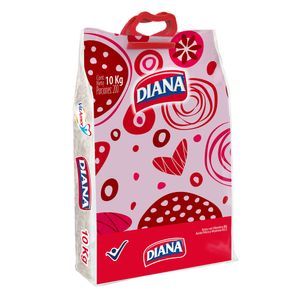

In [51]:
image

,Unnamed: 0,name,image,category,image_path
0,0,Arroz Diana blanco x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/0.webp
1,1,Arroz Diana blanco x5kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/1.webp
2,2,Arroz Sonora x10kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/2.webp
3,3,Arroz Diana blanco x3kg,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/3.webp
4,4,Arroz Diana Premium blanco x4000g,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/despensa/arroz-y-granos,./images/4.webp
...,...,...,...,...,...
7445,7446,Desodorante Antitranspirante Rexona Men Motion...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7445.webp
7446,7447,Desodorante Aclarante Nivea Tono Natural Class...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7446.webp
7447,7448,Desodorante Balance Mini Crema Clinical Protec...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7447.webp
7448,7449,Desodorante Hombre Speed Stick Xtreme Night Ge...,https://jumbocolombiaio.vtexassets.com/arquivo...,supermercado/cuidado-personal/desodorantes,./images/7448.webp


In [64]:
df['file_name'] = df["Unnamed: 0"].apply(lambda x: f'{x}.webp')  # Ruta local


In [66]:
df["text"] = df["name"]

In [70]:
df[["file_name", "name"]].to_csv("./productos-de-jumbo/metadata.csv", index=False)

In [71]:
df[["file_name", "name"]]

,file_name,name
0,0.webp,Arroz Diana blanco x10kg
1,1.webp,Arroz Diana blanco x5kg
2,2.webp,Arroz Sonora x10kg
3,3.webp,Arroz Diana blanco x3kg
4,4.webp,Arroz Diana Premium blanco x4000g
...,...,...
7445,7446.webp,Desodorante Antitranspirante Rexona Men Motion...
7446,7447.webp,Desodorante Aclarante Nivea Tono Natural Class...
7447,7448.webp,Desodorante Balance Mini Crema Clinical Protec...
7448,7449.webp,Desodorante Hombre Speed Stick Xtreme Night Ge...


In [73]:
df["supermarket_category"] = df["category"].apply(lambda x: x.split("/")[0] if "/" in x else x)
df["main_category"] = df["category"].apply(lambda x: x.split("/")[1] if "/" in x else "")
df["subcategory"] = df["category"].apply(lambda x: x.split("/")[2] if "/" in x else "")

In [75]:
df[["file_name", "name", "supermarket_category", "main_category", "subcategory"]].to_csv("./dataset/metadata.csv", index=False)